## 6.5 Machine Learning Part II

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

# 1. Importing libraries and data and renaming columns

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [41]:
# Ensures the graphs created are displayed in notebook without the need to "call" them specifically.
%matplotlib inline

In [43]:
path = 'C:/Users/samco/OneDrive/Achievement 6 Career Foundry/world-happiness'

In [45]:
df = pd.read_csv(os.path.join(path, 'World Happiness 2015-2024 Combined.csv')) 

In [47]:
df.shape

(1510, 10)

In [49]:
df.head()

,Country,Region,Happiness_Score,Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


### Data processing

In [52]:
df.columns

Index(['Country', 'Region', 'Happiness_Score', 'Gdp_Per_Capita',
       'Social_Support', 'Healthy_Life_Expectancy',
       'Freedom_to_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Year'],
      dtype='object')

In [54]:
# Country and Region are categorical data 

In [56]:
columns_included = ['Happiness_Score', 'Gdp_Per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom_to_Make_Life_Choices', 'Generosity', 'Perceptions_of_Corruption', 'Year']

In [58]:
df_sub = df[columns_included]

In [60]:
df_sub.shape

(1510, 8)

In [62]:
# Define a standard scaler object
scaler = StandardScaler()

In [64]:
df_sub_scaled = scaler.fit_transform(df_sub)

In [77]:
# Check for missing values
df_sub.isnull().sum()

# No missing values for Happiness Scores and only 3 for GDP per capita.

Happiness_Score                 0
Gdp_Per_Capita                  3
Social_Support                  3
Healthy_Life_Expectancy         4
Freedom_to_Make_Life_Choices    3
Generosity                      3
Perceptions_of_Corruption       4
Year                            0
dtype: int64

In [88]:
# Drop missing values
df_sub.dropna(inplace=True) # Removes all rows with NaN values

C:\Users\samco\AppData\Local\Temp\ipykernel_25544\4278643228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.dropna(inplace=True) # Removes all rows with NaN values


In [90]:
df_sub.isnull().sum() # Checking that all missing values were dropped

Happiness_Score                 0
Gdp_Per_Capita                  0
Social_Support                  0
Healthy_Life_Expectancy         0
Freedom_to_Make_Life_Choices    0
Generosity                      0
Perceptions_of_Corruption       0
Year                            0
dtype: int64

## 2. Elbow Technique

In [93]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.

In [95]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_sub)
    inertia.append(kmeans.inertia_)

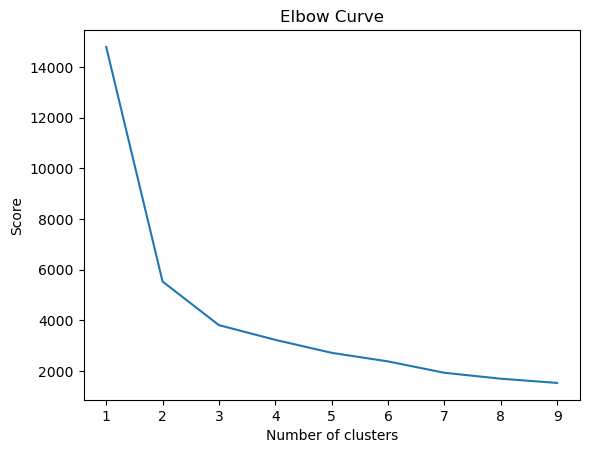

In [97]:
# Plot the scores to visualize the 'elbow'
pl.plot(num_cl,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

#### The number of clusters begins to flatten out at 4 clusters.

## 3. K-Means clustering

In [109]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [111]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=4)

In [113]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\samco\AppData\Local\Temp\ipykernel_25544\4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [115]:
df_sub.head()

,Happiness_Score,Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Year,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,1


In [117]:
df_sub['clusters'].value_counts()

clusters
1    625
0    436
3    257
2    187
Name: count, dtype: int64

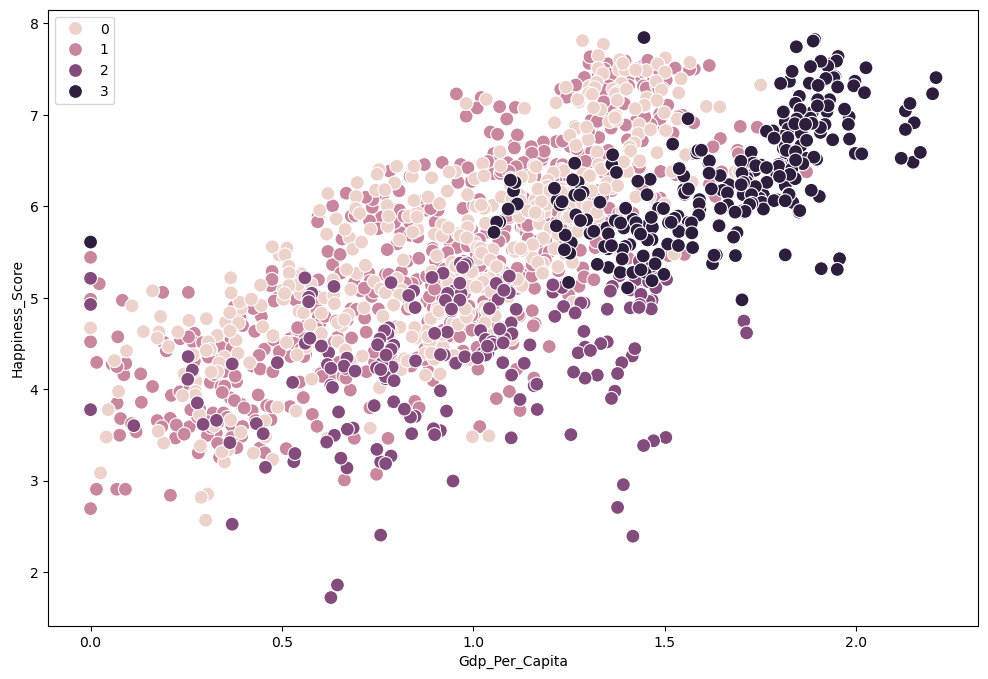

In [127]:
# Plot the clusters for the "Gdp_Per_Capita" and "Happiness_Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Gdp_Per_Capita'], y=df_sub['Happiness_Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Gdp_Per_Capita') # Label x-axis.
plt.ylabel('Happiness_Score') # Label y-axis.
plt.show()

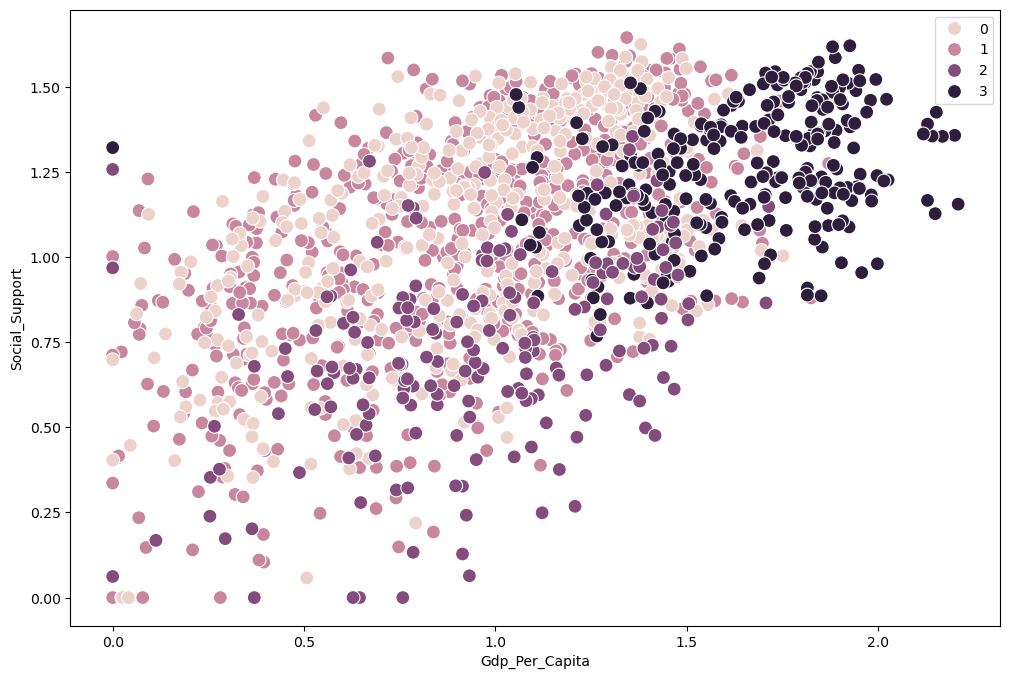

In [125]:
# Plot the clusters for the "Gdp_Per_Capita" and "Social_Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Gdp_Per_Capita'], y=df_sub['Social_Support'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Gdp_Per_Capita') 
plt.ylabel('Social_Support') 
plt.show()

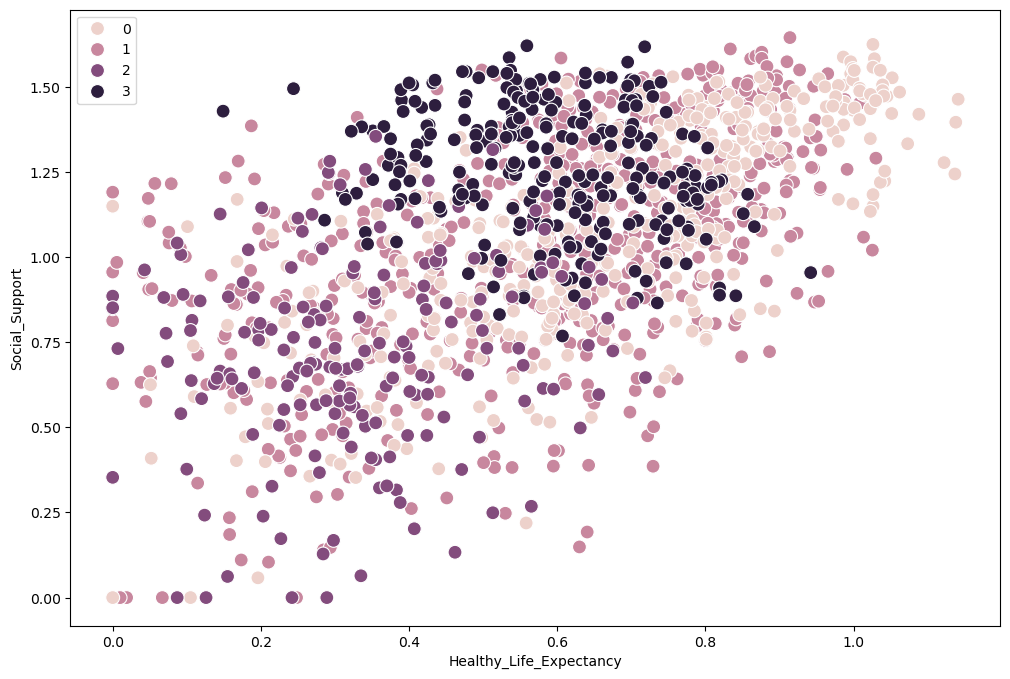

In [129]:
# Plot the clusters for the "Healthy_Life_Expectancy" and "Social_Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Healthy_Life_Expectancy'], y=df_sub['Social_Support'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Healthy_Life_Expectancy') 
plt.ylabel('Social_Support') 
plt.show()

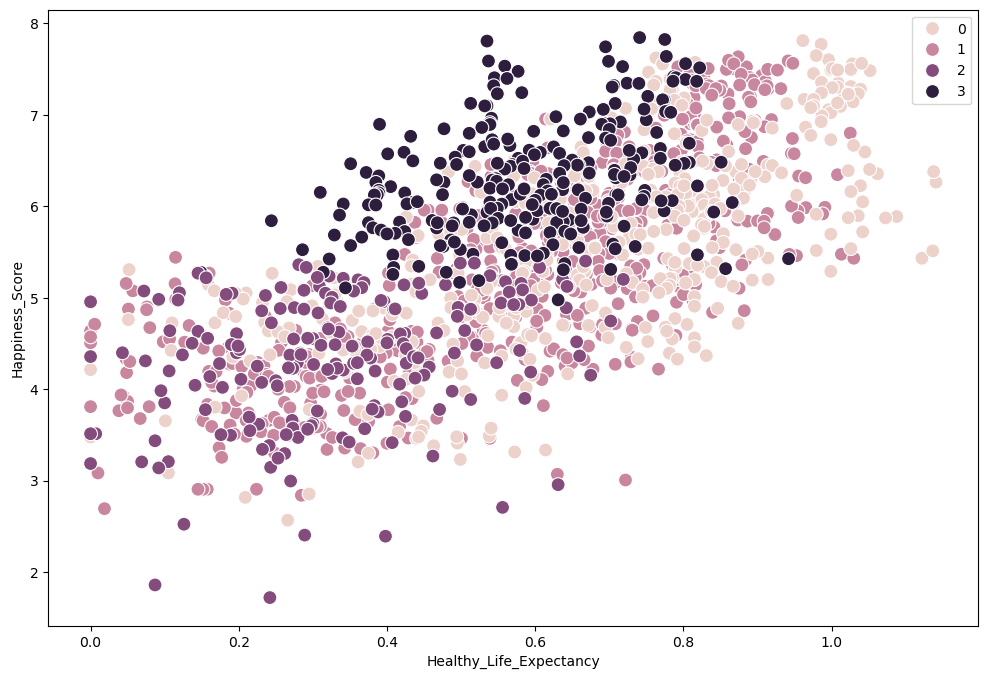

In [131]:
# Plot the clusters for the "Healthy_Life_Expectancy" and "Happiness_Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Healthy_Life_Expectancy'], y=df_sub['Happiness_Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Healthy_Life_Expectancy') 
plt.ylabel('Happiness_Score') 
plt.show()

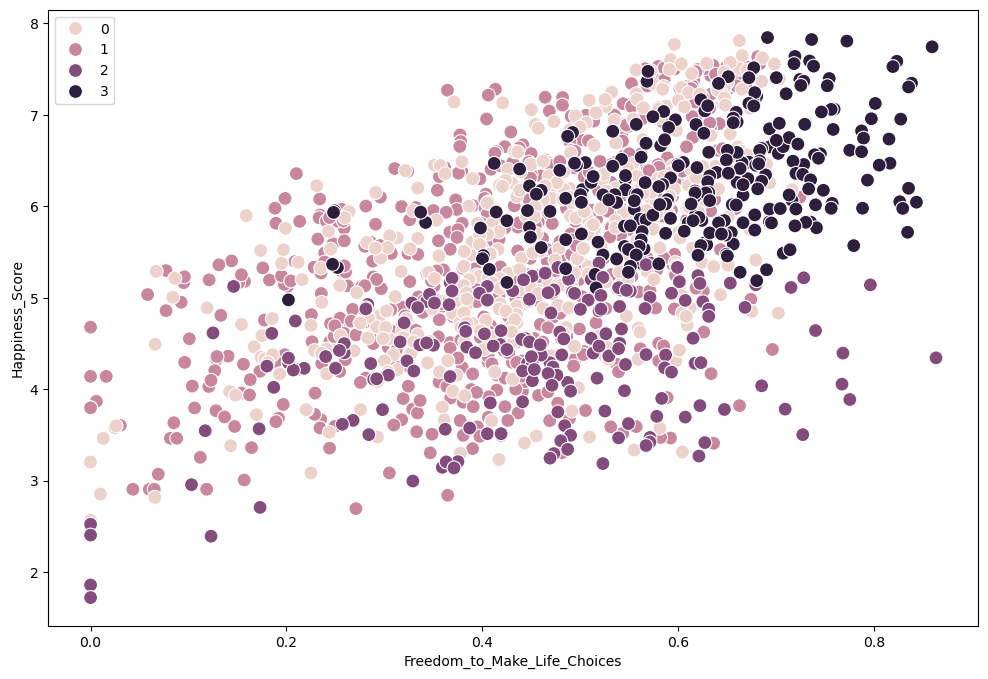

In [133]:
# Plot the clusters for the "Freedom_to_Make_Life_Choices" and "Happiness_Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Freedom_to_Make_Life_Choices'], y=df_sub['Happiness_Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Freedom_to_Make_Life_Choices') 
plt.ylabel('Happiness_Score') 
plt.show()

<Figure size 1200x800 with 0 Axes>

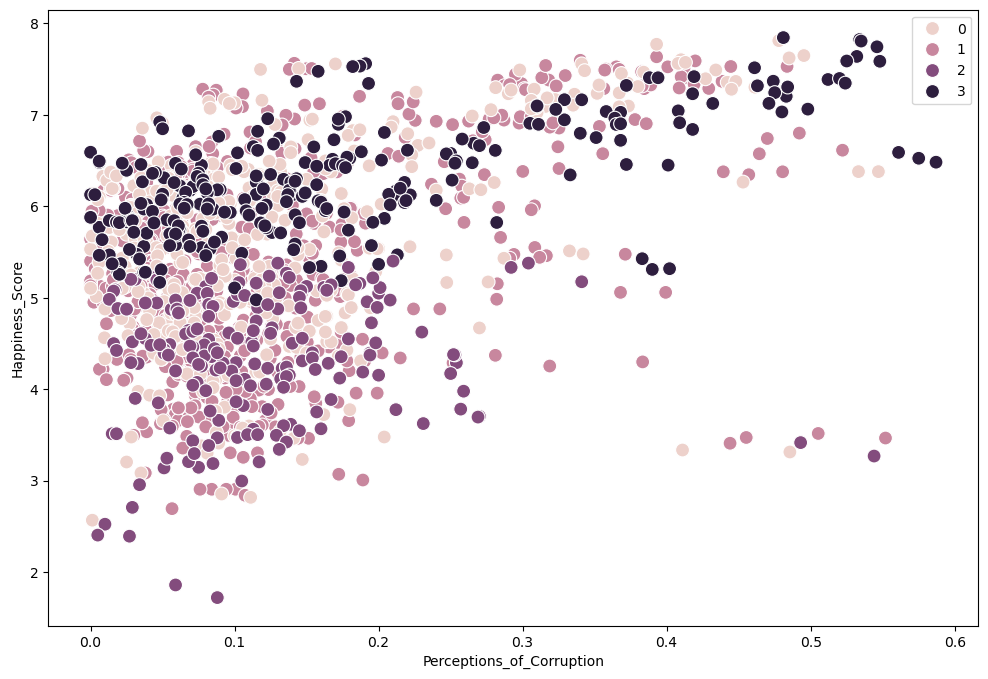

In [137]:
# Plot the clusters for the "Perceptions_of_Corruption" and "Happiness_Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Perceptions_of_Corruption'], y=df_sub['Happiness_Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Perceptions_of_Corruption') 
plt.ylabel('Happiness_Score') 
plt.show()

In [165]:
# Calculate descriptive statistics for each cluster

df_sub.loc[df_sub['clusters'] == 3, 'clusters'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 2, 'clusters'] = 'purple'
df_sub.loc[df_sub['clusters'] == 1, 'clusters'] = 'light purple'
df_sub.loc[df_sub['clusters'] == 0, 'clusters'] = 'light pink'



df_sub.groupby('clusters').agg({'Happiness_Score':['mean', 'median'], 
                         'Gdp_Per_Capita':['mean', 'median'], 
                         'Social_Support':['mean', 'median'],
                          'Healthy_Life_Expectancy':['mean', 'median'],
                           'Freedom_to_Make_Life_Choices':['mean', 'median'],
                           'Generosity':['mean', 'median']})

Happiness_Score          Gdp_Per_Capita           Social_Support  \
                        mean   median           mean    median           mean   
clusters                                                                        
dark purple         6.293681  6.21300       1.650319  1.705000       1.262280   
light pink          5.544353  5.53575       0.937422  0.988113       1.084692   
light purple        5.369778  5.30300       0.916880  0.982409       1.046323   
purple              4.329856  4.39600       0.948904  0.947000       0.718765   

                       Healthy_Life_Expectancy            \
                median                    mean    median   
clusters                                                   
dark purple   1.260000                0.590747  0.587000   
light pink    1.105699                0.667188  0.700894   
light purple  1.081418                0.584162  0.632106   
purple        0.727000                0.332834  0.322000   

             Freedom_to_Make_Life_Choices          Generosity            
                                     mean   median       mean    median  
clusters                                                                 
dark purple                      0.625471  0.63900   0.143689  0.127000  
light pink                       0.454374  0.47200   0.184106  0.174525  
light purple                     0.415917  0.43477   0.227047  0.208733  
purple                           0.447005  0.46900   0.157283  0.150000

In [168]:
# Calculate descriptive statistics for each cluster

df_sub.loc[df_sub['clusters'] == 3, 'clusters'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 2, 'clusters'] = 'purple'
df_sub.loc[df_sub['clusters'] == 1, 'clusters'] = 'light purple'
df_sub.loc[df_sub['clusters'] == 0, 'clusters'] = 'light pink'



df_sub.groupby('clusters').agg({'Perceptions_of_Corruption':['mean', 'median']})

Perceptions_of_Corruption          
                                  mean    median
clusters                                        
dark purple                   0.175969  0.134000
light pink                    0.124612  0.090196
light purple                  0.129138  0.094000
purple                        0.117278  0.103000

#### The dark purple cluster has the highest stats in happiness scores, gdp per capita, and freedom to make life choices than the other clusters. It ranks lowest on the generosity. 
#### The light pink cluster and light purple cluster are close in terms of happiness scores and gdp per capita, and social support and freedom to make life choices. The light pink is higher with healthy life expectancy.
#### The light purple cluster is higher than the light pink in generosity.
#### The purple cluster is also close to the link pink and light purple in terms of gdp per capita, and is the lowest for healthy life expectancy.
#### Perceptions of corruption were low for all clusters.

#### These results are interesting because, whereas the previous exercises showed nearly no relationship between percpetions of corruption and happiness scores, these scatter plots actually show that perceptions of corruption can range from low to high, and happiness scores are plotted across the entirety of the plot, i.e., just because perceptions of corruption were high, did not indicate that happiness scores would plummet. It also shows that there is a pattern with freedom to make life choices and happiness scores. Another interesting finding is that happiness scores clustered in the middle of healthy life expectancy plot, where one might expect them to be higher up on the plot where healthy life expectancy is highest. Interestingly, the same was evident for healthy life expectancy and social support. 